In [1]:
! nvidia-smi

Wed May 28 21:20:41 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.12
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                41.3/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.3>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key='REDACTED')
project = rf.workspace('passthebutter').project('butterdetector')
dataset = project.version(1).download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to ButterDetector-1 in yolov11:: 100%|██████████| 1202/1202 [00:00<00:00, 6827.69it/s]


In [12]:
!yolo task=detect mode=train model=yolo11n.pt  data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ButterDetector-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

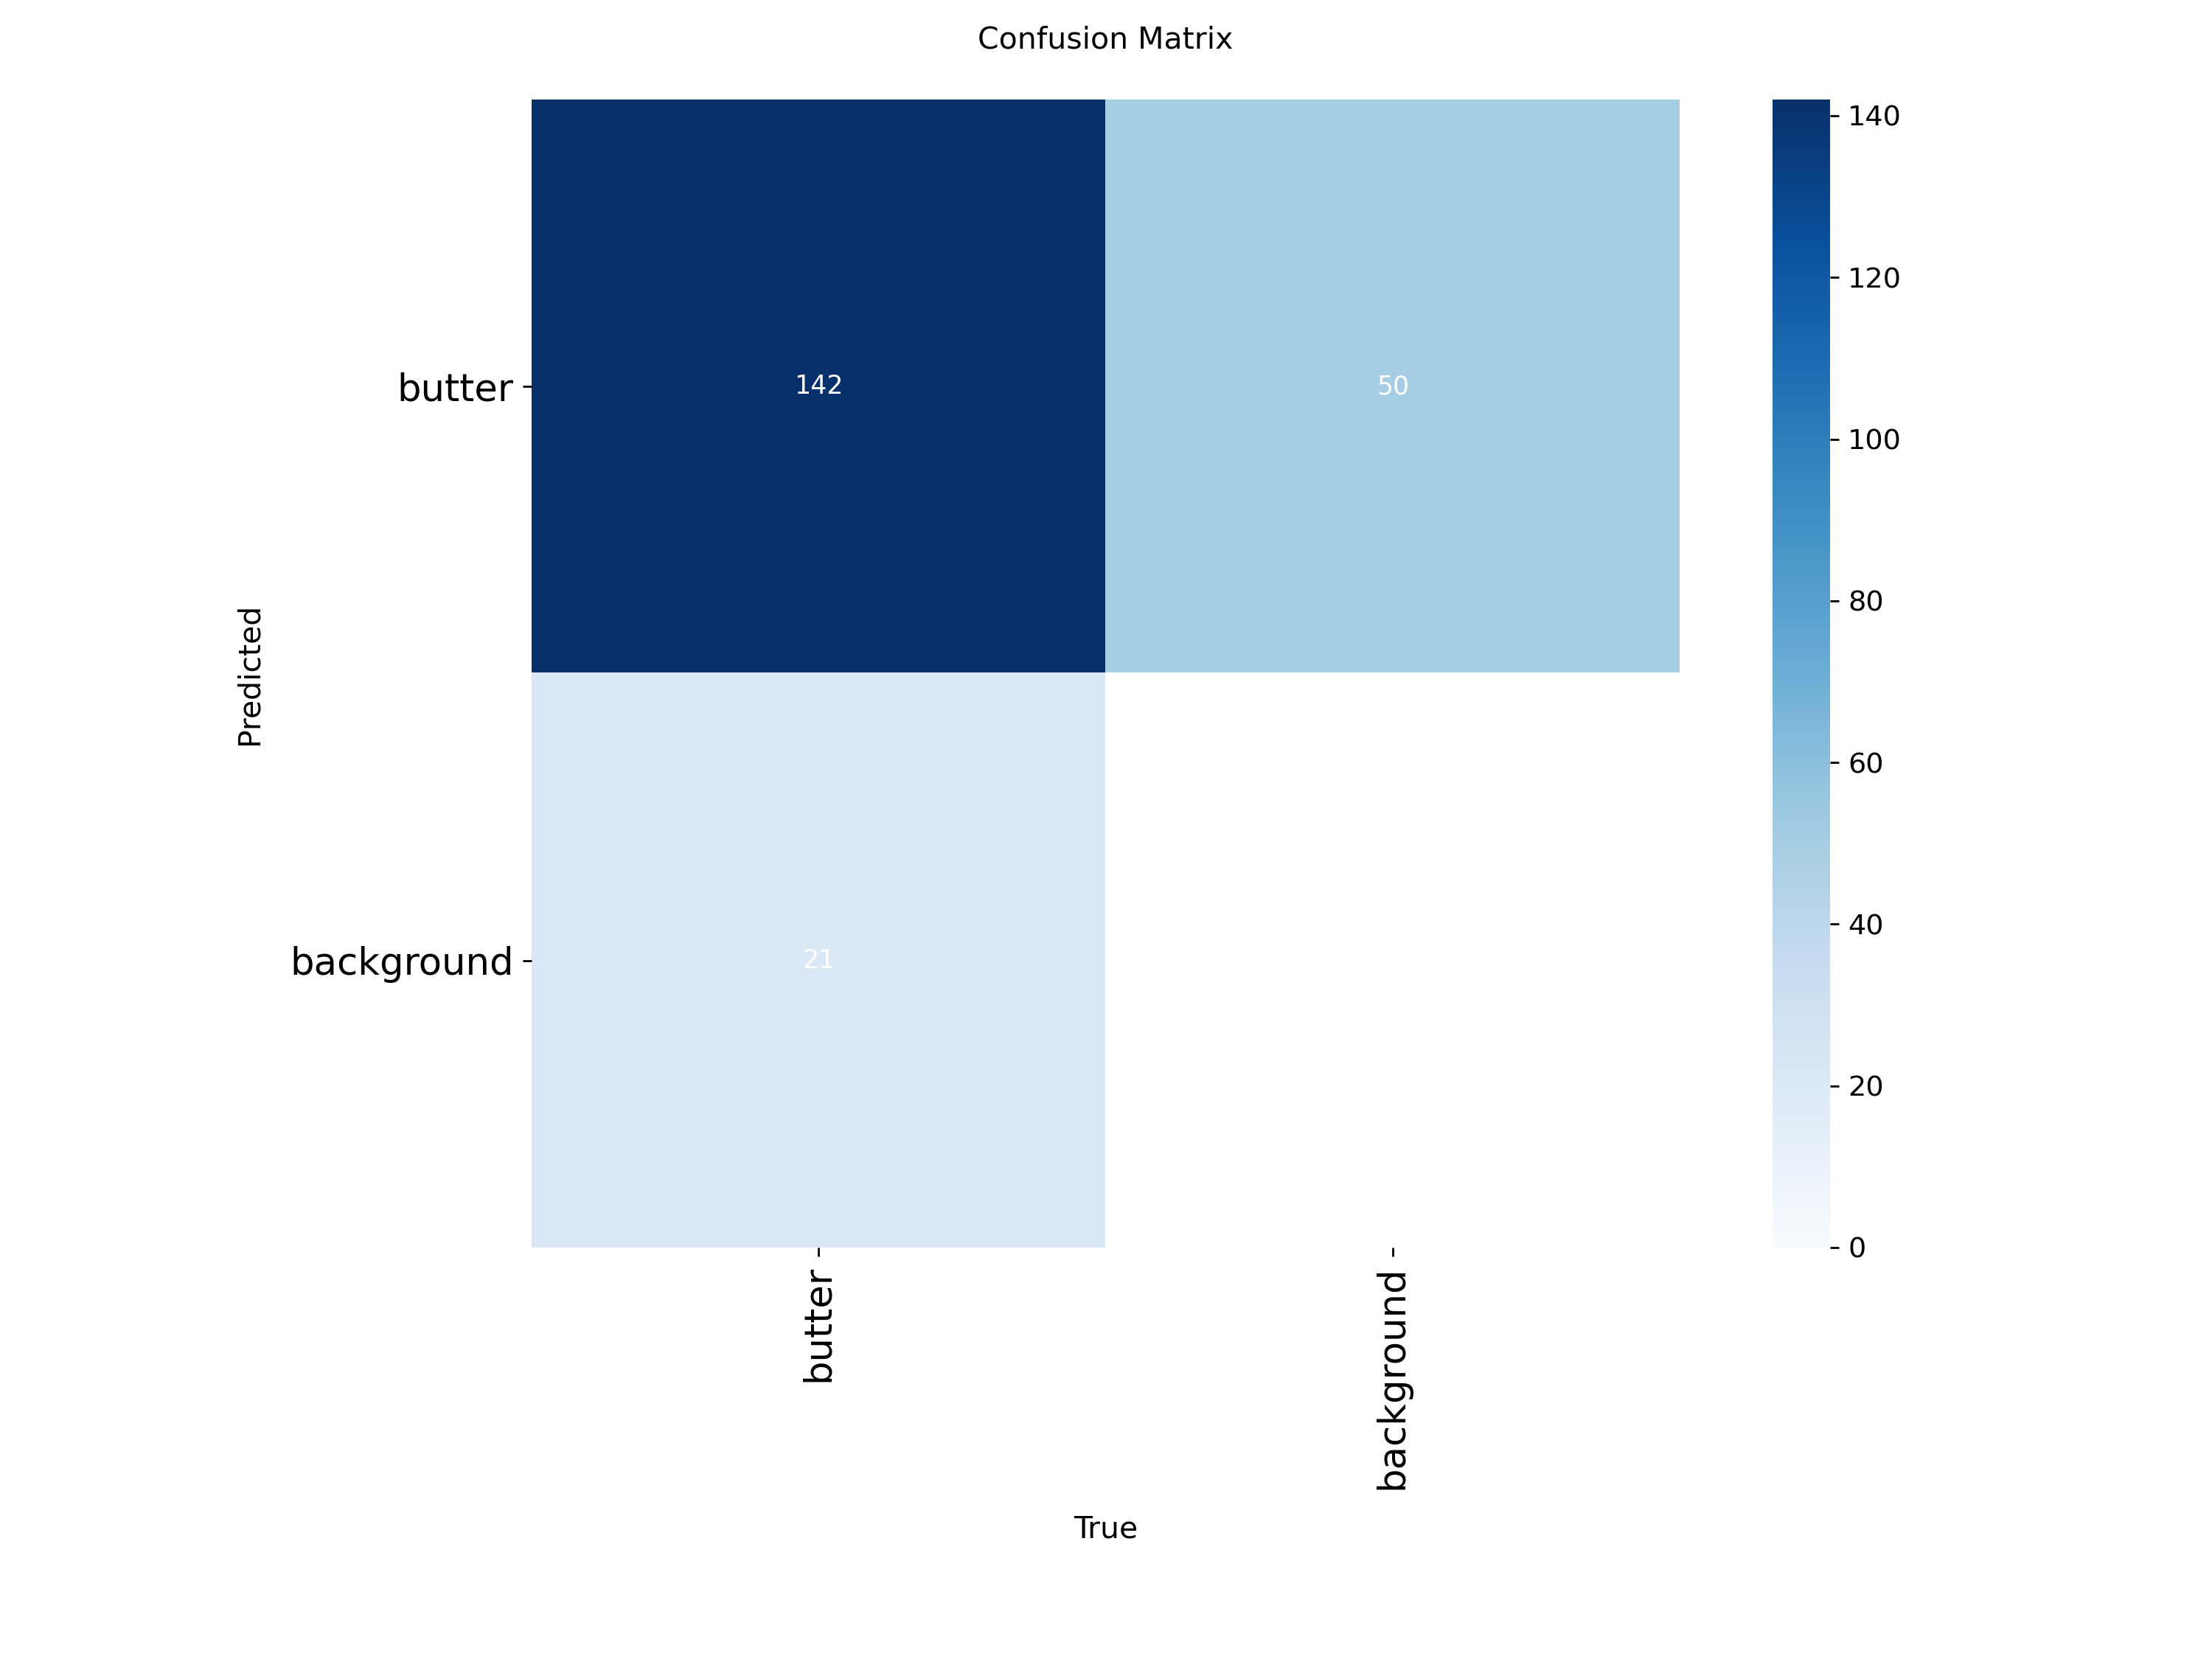

In [13]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=600)

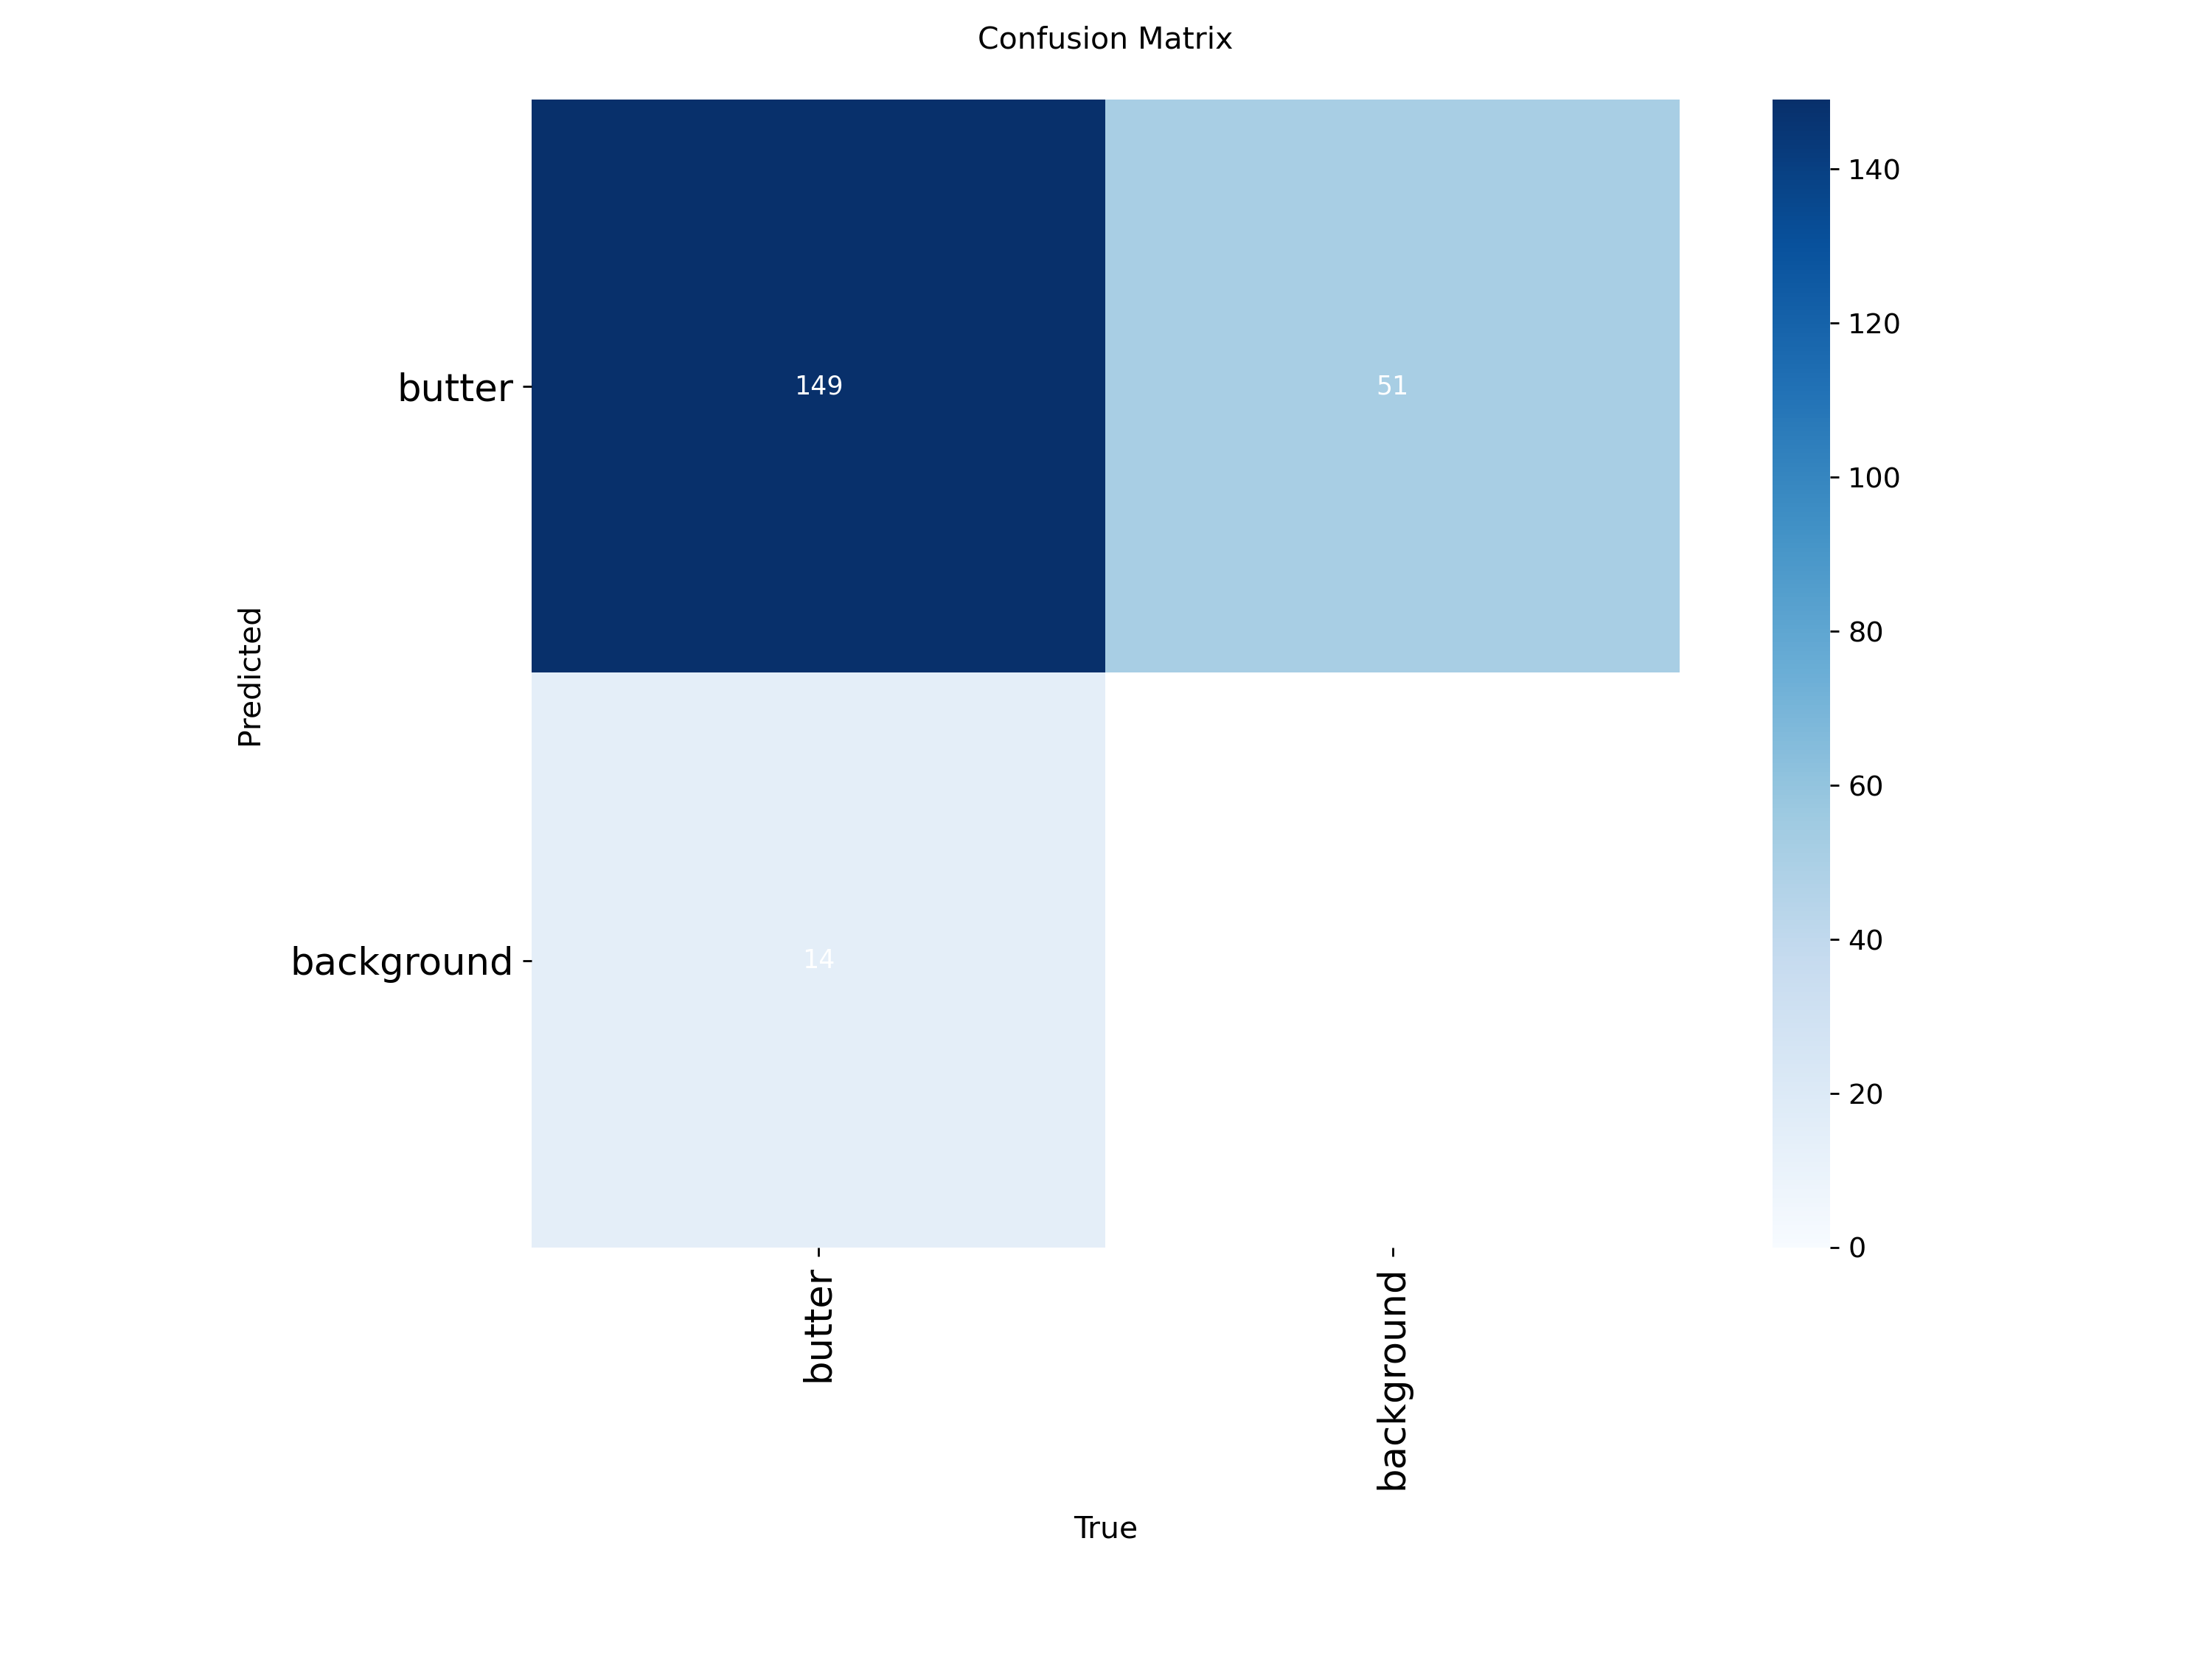

In [14]:
Image(filename=f"/content/runs/detect/train2/confusion_matrix.png", width=600)

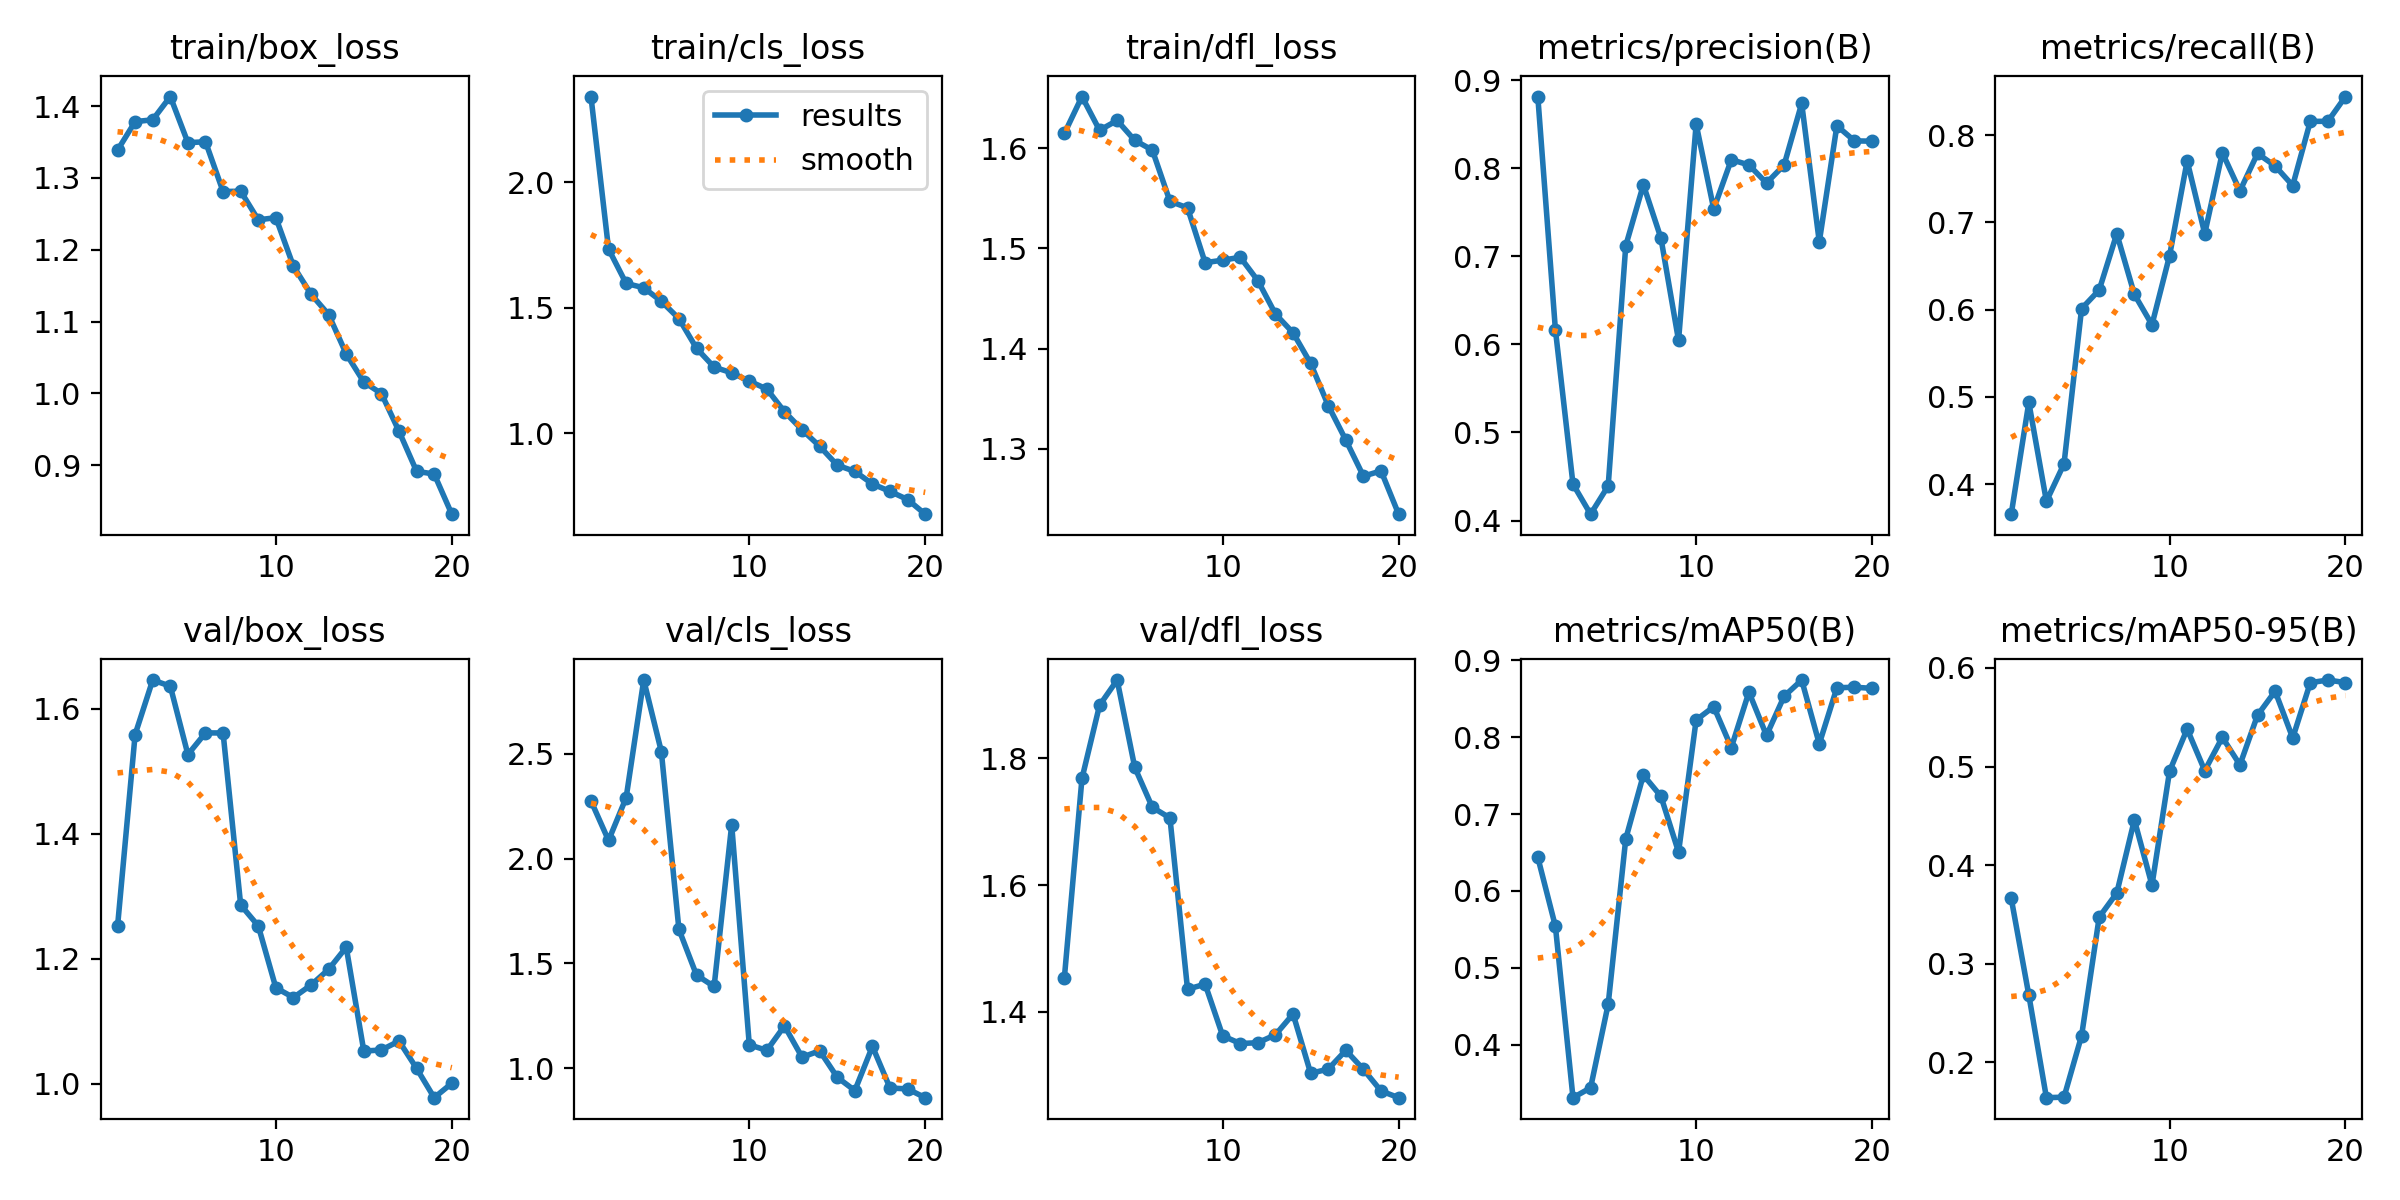

In [18]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

In [19]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1990.4±803.1 MB/s, size: 62.3 KB)
val: Scanning /content/ButterDetector-1/valid/labels.cache... 52 images, 0 backgrounds, 0 corrupt: 100% 52/52 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:01<00:00,  2.06it/s]
                   all         52        163      0.832      0.816      0.865      0.588
Speed: 5.4ms preprocess, 11.7ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [23]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height=600))
  print('\n')

In [31]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [32]:
model.export(format='ncnn')

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)

TorchScript: starting export with torch 2.6.0+cu124...
TorchScript: export success ✅ 2.7s, saved as '/content/runs/detect/train/weights/best.torchscript' (10.4 MB)
requirements: Ultralytics requirement ['ncnn'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 1.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


NCNN: starting export with NCNN 1.0.20250503...
WARNING ⚠️ NCNN: PNNX not found. Attempting to download binary file from https://github.com/pnnx/pnnx/.
Note PNNX Binary file

100%|██████████| 23.6M/23.6M [00:00<00:00, 116MB/s] 
Unzipping pnnx-20250430-linux.zip to /content/pnnx-20250430-linux...: 100%|██████████| 3/3 [00:00<00:00,  6.33file/s]

NCNN: running '/usr/local/lib/python3.11/dist-packages/ultralytics/pnnx /content/runs/detect/train/weights/best.torchscript ncnnparam=/content/runs/detect/train/weights/best_ncnn_model/model.ncnn.param ncnnbin=/content/runs/detect/train/weights/best_ncnn_model/model.ncnn.bin ncnnpy=/content/runs/detect/train/weights/best_ncnn_model/model_ncnn.py pnnxparam=/content/runs/detect/train/weights/best_ncnn_model/model.pnnx.param pnnxbin=/content/runs/detect/train/weights/best_ncnn_model/model.pnnx.bin pnnxpy=/content/runs/detect/train/weights/best_ncnn_model/model_pnnx.py pnnxonnx=/content/runs/detect/train/weights/best_ncnn_model/model.pnnx.onnx fp16=0 device=cpu inputshape="[1, 3, 640, 640]"'


NCNN: export success ✅ 4.6s, saved as '/content/runs/detect/train/weights/best_ncnn_model' (10.0 MB)

Export complete (7.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best_ncnn_model imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best_ncnn_model imgsz=640 data=/content/ButterDetector-1/data.yaml  
Visualize:       https://netron.app


'/content/runs/detect/train/weights/best_ncnn_model'

In [30]:
! ls

/content/runs/detect/train/weights/best.pt


In [33]:
ncnn_model = YOLO('/content/runs/detect/train/weights/best_ncnn_model')